# Statistical Simulation

In [72]:
import numpy as np
# Initialize seed and parameters
np.random.seed(123) 
lam, size_1, size_2 = 5, 3, 1000  

In [73]:
lam

5

In [74]:
size_1

3

In [75]:
size_2

1000

In [76]:
# Draw samples & calculate absolute difference between lambda and sample mean
samples_1 = np.random.poisson(lam, size_1)
samples_2 = np.random.poisson(lam, size_2)

In [77]:
samples_1

array([7, 5, 4])

In [81]:
answer_1 = abs(lam - samples_1.mean())
answer_2 = abs(lam - samples_2.mean()) 

In [79]:
samples_1.mean()

5.333333333333333

In [80]:
samples_2.mean()

4.923

In [82]:
print("|Lambda - sample mean| with {} samples is {} and with {} samples is {}. ".format(size_1, answer_1, size_2, answer_2))

|Lambda - sample mean| with 3 samples is 0.33333333333333304 and with 1000 samples is 0.07699999999999996. 


## A short example
If a person eats twice a day, what is the probability of that person eats thrice in a day?

In [32]:
from numpy import random

x = random.poisson(lam=2, size=10)

print(x)

[1 2 1 3 1 2 1 1 2 1]


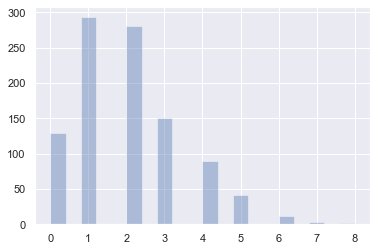

In [34]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.poisson(lam=2, size=1000), kde=False)

plt.show()

## Simulating a dice game

The dice game involces throwing two dice and winning if they show the same number. What we need:
- First two steps we first define the outcomes of the die and assign a probability to each outcome.
- Since both A and B dies are fari, we can use identical probability distributions. Since the probability of seeing each outcome is the same, this is a uniform distribution.
- In step 3, we define the relationship between each dice. If they show the same number, we win, otherwise we lose.
- In the last step, we generate multiple outcomes through repeated random sampling.

Throwing 1 dice

In [88]:
# Define die outcomes and probabilities
die, probabilities, throws = [1,2,3,4,5,6], [1/6,1/6,1/6,1/6,1/6,1/6], 1

# Use np.random.choice to throw the die once and record the outcome
outcome = np.random.choice(die, size=throws, p=probabilities)
print("Outcome of the throw: {}".format(outcome[0]))

Outcome of the throw: 1


Throwing two dice

In [92]:
# Initialize number of dice, simulate & record outcome
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
outcomes = np.random.choice(die, size=num_dice, p=probabilities) 

# Win if the two dice show the same number
if outcomes[0] == outcomes[1]: 
    answer = 'win' 
else:
    answer = 'lose'

print("The dice show {} and {}. You {}!".format(outcomes[0], outcomes[1], answer))

The dice show 6 and 1. You lose!


Let's repeat the process. In how many games you will win?

In [97]:
# Initialize model parameters & simulate dice throw
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
sims, wins = 100, 0

for i in range(sims):
    outcomes = np.random.choice(die, size=num_dice, p=probabilities) 
    # Increment `wins` by 1 if the dice show same number
    if outcomes[0] == outcomes[1]:
        wins = wins + 1

print("In {} games, you win {} times".format(sims, wins))

In 100 games, you win 15 times


## Implementation of Simulation On Decision-Making

#### Simulating one lottery drawing

* There are 1000 tickets and the grand prize is $10.000

* Your probability of winning is 1/1000.

* Each ticket costs $10.



In [102]:
# Pre-defined constant variables
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000
# Probability of winning
chance_of_winning = 1/num_tickets
# Simulate a single drawing of the lottery
gains = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probability = [1-chance_of_winning, chance_of_winning]
outcome = np.random.choice(a=gains, size=1, p=probability, replace=True)
print("Outcome of one drawing of the lottery is {}".format(outcome))

Outcome of one drawing of the lottery is [-10]


In [104]:
probability

[0.999, 0.001]

 In this exercise, we complete the simulation process by repeating the process multiple times.

In [186]:
# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000
chance_of_winning = 1/num_tickets
size = 2000
payoffs = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probs = [1-chance_of_winning, chance_of_winning]

outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)

# Mean of outcomes.
answer = outcomes.mean()
print("Average payoff from {} simulations = {}".format(size, answer))

Average payoff from 2000 simulations = -5.0


In [187]:
outcomes

array([-10, -10, -10, ..., -10, -10, -10])

In [188]:
# Initialize simulations and cost of ticket
sims, lottery_ticket_cost = 3000, 0

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 1
answer = lottery_ticket_cost - 1

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))

The highest price at which it makes sense to buy the ticket is 6


## Using Simulation for Probability Estimation
    1-Construct sample space or population.
    2-Determine how to simulate one outcome.
    3-Detemine rule for successes.
    4-Sample repeatedly and count successes.
    5-Calculate frequency of successes as an estimete of probability.

Probability of having two of a kind (means that having the same numeric value but different kinds).    

In [250]:
deck_of_cards=[('Heart',0),
              ('Heart',1),
              ('Heart',2),
              ('Heart',3),
              ('Heart',4),
              ('Heart',5),
              ('Heart',6),
              ('Heart',7),
              ('Heart',8),
              ('Heart',9),
              ('Heart',10),
              ('Heart',11),
              ('Heart',12),
              ('Club',0),
              ('Club',1),
              ('Club',2),
              ('Club',3),
              ('Club',4),
              ('Club',5),
              ('Club',6),
              ('Club',7),
              ('Club',8),
              ('Club',9),
              ('Club',10),
              ('Club',11),
              ('Club',12),
              ('Spade',0),
              ('Spade',1),
              ('Spade',2),
              ('Spade',3),
              ('Spade',4),
              ('Spade',5),
              ('Spade',6),
              ('Spade',7),
              ('Spade',8),
              ('Spade',9),
              ('Spade',10),
              ('Spade',11),
              ('Spade',12),
              ('Diamond',0),
              ('Diamond',1),
              ('Diamond',2),
              ('Diamond',3),
              ('Diamond',4),
              ('Diamond',5),
              ('Diamond',6),
              ('Diamond',7),
              ('Diamond',8),
              ('Diamond',9),
              ('Diamond',10),
              ('Diamond',11),
              ('Diamond',12),]

In [197]:
deck_of_card

[('Heart', 0),
 ('Heart', 1),
 ('Heart', 2),
 ('Heart', 3),
 ('Heart', 4),
 ('Heart', 5),
 ('Heart', 6),
 ('Heart', 7),
 ('Heart', 8),
 ('Heart', 9),
 ('Heart', 10),
 ('Heart', 11),
 ('Heart', 12),
 ('Club', 0),
 ('Club', 1),
 ('Club', 2),
 ('Club', 3),
 ('Club', 4),
 ('Club', 5),
 ('Club', 6),
 ('Club', 7),
 ('Club', 8),
 ('Club', 9),
 ('Club', 10),
 ('Club', 11),
 ('Club', 12),
 ('Spade', 0),
 ('Spade', 1),
 ('Spade', 2),
 ('Spade', 3),
 ('Spade', 4),
 ('Spade', 5),
 ('Spade', 6),
 ('Spade', 7),
 ('Spade', 8),
 ('Spade', 9),
 ('Spade', 10),
 ('Spade', 11),
 ('Spade', 12),
 ('Diamond', 0),
 ('Diamond', 1),
 ('Diamond', 2),
 ('Diamond', 3),
 ('Diamond', 4),
 ('Diamond', 5),
 ('Diamond', 6),
 ('Diamond', 7),
 ('Diamond', 8),
 ('Diamond', 9),
 ('Diamond', 10),
 ('Diamond', 11),
 ('Diamond', 12)]

In [268]:
# Shuffle deck & count card occurrences in the hand
n_sims, two_kind = 10000, 0
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for [suite, numeric_value] in hand:
        # Count occurrences of each numeric value
        cards_in_hand[numeric_value] = cards_in_hand.get(numeric_value, 0) + 1
    
    # Condition for getting at least 2 of a kind
    if max(cards_in_hand.values()) >=2: 
        two_kind += 1

print("Probability of seeing at least two of a kind = {} ".format(two_kind/n_sims))

Probability of seeing at least two of a kind = 0.4929 


#### Game of thirteen by Pierre Raymond De Montmart

In [269]:
# Pre-set constant variables
deck, sims, coincidences = np.arange(1, 14), 10000, 0

for _ in range(sims):
    # Draw all the cards without replacement to simulate one game
    draw = np.random.choice(deck, size=13, replace=False) 
    # Check if there are any coincidences
    coincidence = (draw == list(np.arange(1, 14))).any()
    if coincidence == True:
        coincidences += 1

# Calculate probability of winning
prob_of_winning = 1-coincidences/sims
print("Probability of winning = {}".format(prob_of_winning))

Probability of winning = 0.36760000000000004


#### The conditional urn

In [275]:
# Initialize success, sims and urn
success, sims = 0, 5000
urn = ['w']*7 + ['b']*6

for i in range(sims):
    # Draw 4 balls without replacement
    draw = np.random.choice(urn, replace=False, size=4)
    # Count the number of successes
    if (draw[0] == 'w') & (draw[1] == 'b') & (draw[2] == 'w') & (draw[3] == 'b'):
        success +=1

print("Probability of success = {}".format(success/sims))

Probability of success = 0.0732


#### The birthday problem
How many people do you need in a room to ensure at least a 50% chance that two of them share the same birthday?
With 366 people in a 365-day year, we are 100% sure that at least two have the same birthday, but we only need to be 50% sure.

In [276]:
# Draw a sample of birthdays & check if each birthday is unique
days = np.arange(1,366)
people = 2

def birthday_sim(people):
    sims, unique_birthdays = 2000, 0 
    for _ in range(sims):
        draw = np.random.choice(days, size=people, replace=True) 
        if len(draw) == len(set(draw)): 
            unique_birthdays += 1
    out = 1 - unique_birthdays / sims
    return out

In [277]:
# Break out of the loop if probability greater than 0.5
while (people > 0):
    prop_bds = birthday_sim(people)
    if prop_bds > 0.5: 
        break
    people += 1

print("With {} people, there's a 50% chance that two share a birthday.".format(people))

With 24 people, there's a 50% chance that two share a birthday.


## Data Generating

#### Driving Test
Through the next exercises, we will learn how to build a data generating process (DGP) through progressively complex examples.

In this exercise, you will simulate a very simple DGP. Suppose that you are about to take a driving test tomorrow. Based on your own practice and based on data you have gathered, you know that the probability of you passing the test is 90% when it's sunny and only 30% when it's raining. Your local weather station forecasts that there's a 40% chance of rain tomorrow. Based on this information, you want to know what is the probability of you passing the driving test tomorrow.

This is a simple problem and can be solved analytically. Here, you will learn how to model a simple DGP and see how it can be used for simulation.
Write a function test_outcome().
Set weather as 'rain' or 'sun' depending on the input argument p_rain (the probability of rain).
Set the appropriate probabilities of 'pass' and 'fail' in test_result using weather & the dictionary p_pass.

In [294]:
sims, outcomes, p_rain, p_pass = 1000, [], 0.40, {'sun':0.9, 'rain':0.3}

def test_outcome(p_rain):
    # Simulate whether it will rain or not
    weather = np.random.choice(['rain', 'sun'], p=[p_rain, 1-p_rain])
    # Simulate and return whether you will pass or fail
    test_result = np.random.choice(['pass', 'fail'], p=[p_pass[weather], 1-p_pass[weather]])
    return test_result

In [295]:
for _ in range(sims):
    outcomes.append(test_outcome(p_rain))

# Calculate fraction of outcomes where you pass
pass_outcomes_frac = sum([x == 'pass' for x in outcomes])/len(outcomes)
print("Probability of Passing the driving test = {}".format(pass_outcomes_frac))

Probability of Passing the driving test = 0.643


#### National Elections
This exercise will give you a taste of how you can model a DGP at different levels of complexity.

Consider national elections in a country with two political parties - Red and Blue. This country has 50 states and the party that wins the most states wins the elections. You have the probability p of Red winning in each individual state and want to know the probability of Red winning nationally.

Let's model the DGP to understand the distribution. Suppose the election outcome in each state follows a binomial distribution with probability p such that 0 indicates a loss for Red and 1 indicates a win. We then simulate a number of election outcomes. Finally, we can ask rich questions like what is the probability of Red winning less than 45% of the states?
- Simulate one election using np.random.binomial() with p = probs and n=1. Assign it to election.
- Append the average of Red's wins in election to outcomes.
- Calculate the fraction of outcomes where Red won less than 45% of the states. Save it as prob_red_wins and use it to print your results.

##### Short Example of Binomial Distribution

In [335]:
from numpy import random

x = random.binomial(n=10, p=0.5, size=10)

print(x)

[5 5 5 7 2 2 6 6 7 4]


In [ ]:
p=np.array([0.52076814, 0.67846401, 0.82731745, 0.64722761, 0.03665174,
       0.17835411, 0.75296372, 0.22206157, 0.72778372, 0.28461556,
       0.72545221, 0.106571  , 0.09291364, 0.77535718, 0.51440142,
       0.89604586, 0.39376099, 0.24910244, 0.92518253, 0.08165597,
       0.4212476 , 0.74123879, 0.2479099 , 0.46125805, 0.19584491,
       0.24440482, 0.349916  , 0.80224624, 0.80186664, 0.82968251,
       0.91178779, 0.51739059, 0.67338858, 0.15675863, 0.37772308,
       0.77134621, 0.71727114, 0.92700912, 0.28386132, 0.25502498,
       0.30081506, 0.19724585, 0.29129564, 0.56623386, 0.97681039,
       0.96263926, 0.0548948 , 0.14092758, 0.54739446, 0.54555576])

In [298]:
outcomes, sims, probs = [], 1000, p

for _ in range(sims):
    # Simulate elections in the 50 states
    # n is the number of trials
    # p is the probability of occurence of each trial.
    election = np.random.binomial(p=probs, n=1)
    # Get average of Red wins and add to `outcomes`
    outcomes.append(election.mean())

# Calculate probability of Red winning in less than 45% of the states
prob_red_wins = sum([(x < 0.45) for x in outcomes])/len(outcomes)
print("Probability of Red winning in less than 45% of the states = {}".format(prob_red_wins))

Probability of Red winning in less than 45% of the states = 0.197


#### Fitness Goals
Let's model how activity levels impact weight loss using modern fitness trackers. On days when you go to the gym, you average around 15k steps, and around 5k steps otherwise. You go to the gym 40% of the time. Let's model the step counts in a day as a Poisson random variable with a mean λ dependent on whether or not you go to the gym.

For simplicity, let’s say you have an 80% chance of losing 1lb and a 20% chance of gaining 1lb when you get more than 10k steps. The probabilities are reversed when you get less than 8k steps. Otherwise, there's an even chance of gaining or losing 1lb. Given all this information, find the probability of losing weight in a month.
- Simulate steps as a Poisson random variable for a given day based on the value of lam.
- Set prob to [0.2, 0.8] if steps > 10000 or to [0.8, 0.2] if steps < 8000. Sum up all the weight lost or gained in a month stored in w.
- Calculate and print the fraction of simulations where total weight for a month in outcomes is less than 0. Save as weight_loss_outcomes_frac and use that to print your results.

In [339]:
sims=1000
days=30
# Simulate steps & choose prob 
for _ in range(sims):
    w = []
    for i in range(days):
        lam = np.random.choice([5000, 15000], p=[0.6, 0.4], size=1)
        steps = np.random.poisson(lam)
        if steps > 10000: 
            prob = [0.2, 0.8]
        elif steps < 8000: 
            prob = [0.8, 0.2]
        else:
            prob = [0.5, 0.5]
        w.append(np.random.choice([1, -1], p=prob))
    outcomes.append(sum(w))

# Calculate fraction of outcomes where there was a weight loss
weight_loss_outcomes_frac = sum([x < 0 for x in outcomes])/len(outcomes)
print("Probability of Weight Loss = {}".format(weight_loss_outcomes_frac))

Probability of Weight Loss = 0.1595


#### E-commerce Ad Simulation


In [341]:
ct_rate = {'low':0.01, 'high':np.random.uniform(low=0.01, high=1.2*0.01)}
su_rate = {'low':0.2, 'high':np.random.uniform(low=0.2, high=1.2*0.2)}

def get_signups(cost, ct_rate, su_rate, sims):
    lam = np.random.normal(loc=100000, scale=2000, size=sims)
    # Simulate impressions(poisson), clicks(binomial) and signups(binomial)
    impressions = np.random.poisson(lam=lam)
    clicks = np.random.binomial(impressions, p=ct_rate[cost])
    signups = np.random.binomial(clicks, p=su_rate[cost])
    return signups

print("Simulated Signups = {}".format(get_signups('high', ct_rate, su_rate, 1)))

Simulated Signups = [198]


In [ ]:
Nice work! Now that we have signups, let's see how to model the purchases from these signups.

In [342]:
def get_revenue(signups):
    rev = []
    np.random.seed(123)
    for s in signups:
        # Model purchases as binomial, purchase_values as exponential
        purchases = np.random.binomial(s, p=0.1)
        purchase_values = np.random.exponential(scale=1000, size=purchases)
        
        # Append to revenue the sum of all purchase values.
        rev.append(purchase_values.sum())
    return rev

print("Simulated Revenue = ${}".format(get_revenue(get_signups('low', ct_rate, su_rate, 1))[0]))

Simulated Revenue = $22014.194422934448


In [343]:
# Initialize sims
sims, cost_diff = 10000, 3000

# Get revenue when the cost is 'low' and when the cost is 'high'
rev_low = get_revenue(get_signups('low', ct_rate, su_rate, sims))
rev_high = get_revenue(get_signups('high', ct_rate, su_rate, sims))

# calculate fraction of times rev_high - rev_low is less than cost_diff
frac = sum([rev_high[i] - rev_low[i] < cost_diff for i in range(len(rev_low))])/len(rev_low)
print("Probability of losing money = {}".format(frac))

Probability of losing money = 0.5179
